# DSO 510 Project EDA for Public vs. Private Schools

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
df=pd.read_csv('universities_cleaned.csv')

In [2]:
df.head(15)

,School_x,business_school,Acceptance Rate,Average Salary,Public(0) or Private(1)
0,University of Pennsylvania (Wharton),Wharton,0.0649,80354,1
1,Washington University in St. Louis (Olin),Olin,0.0970,67115,1
2,University of California-Berkeley (Haas),Haas,0.0430,73302,0
3,Cornell University (Dyson),Dyson,0.0290,74493,1
4,University of Michigan (Ross),Ross,0.1200,72268,0
5,New York University (Stern),Stern,0.0800,80546,1
6,Carnegie Mellon University (Tepper),Tepper,0.1200,77987,1
7,Georgetown University (McDonough),McDonough,0.1584,73019,1
8,University of Virginia (McIntire),McIntire,0.1215,75068,0
9,University of Notre Dame (Mendoza),Mendoza,0.1900,65000,1


In [3]:
df.tail(15)

,School_x,business_school,Acceptance Rate,Average Salary,Public(0) or Private(1)
73,Lipscomb University,Lipscomb,0.6100,46875,1
74,University of North Carolina-Wilmington,North Carolina-Wilmington,0.6100,44507,0
75,Ithaca College,Ithaca,0.8018,50649,1
76,Northern Illinois University,Northern Illinois,0.5384,51120,0
77,University of Michigan-Dearborn,Michigan-Dearborn,0.6200,49507,0
78,Duquesne University (Palumbo-Donahue),Palumbo-Donahue,0.7600,50592,1
79,Bowling Green State University,Bowling Green,0.7000,53300,0
80,University of Miami,Miami,0.3044,60801,1
81,Brigham Young University (Marriott),Marriott,0.6316,55148,1
82,The College of New Jersey,TCNJ,0.4100,58000,0


In [4]:
# Compare the number of public schools and the number of private schools in the sample
df['Public(0) or Private(1)'].value_counts()

0    44
1    44
Name: Public(0) or Private(1), dtype: int64

## Does Average Salary Differ Between Public and Private Schools?

In [5]:
# Compare the average salary between public and private schools in the sample
df.groupby('Public(0) or Private(1)')['Average Salary'].mean().round()

Public(0) or Private(1)
0    57142.0
1    60687.0
Name: Average Salary, dtype: float64

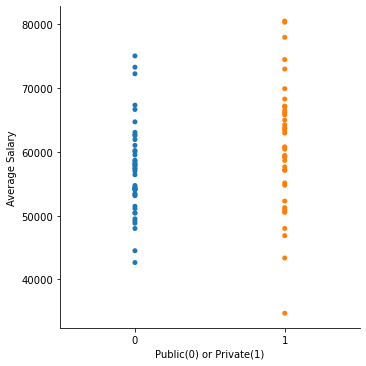

In [6]:
# Display the average salary distribution for public schools and for private schools
sns.catplot(x='Public(0) or Private(1)',y='Average Salary',jitter=False,data=df);

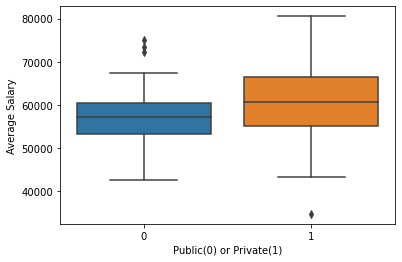

In [7]:
# Use side by side boxplots to highlight outliers
sns.boxplot(x='Public(0) or Private(1)',y='Average Salary',data=df);

## Does Acceptance Rate Differ Between Public and Private Schools?

In [8]:
# Compare the acceptance rate between public and private schools in the sample
df.groupby('Public(0) or Private(1)')['Acceptance Rate'].mean().round(4)

Public(0) or Private(1)
0    0.4641
1    0.4098
Name: Acceptance Rate, dtype: float64

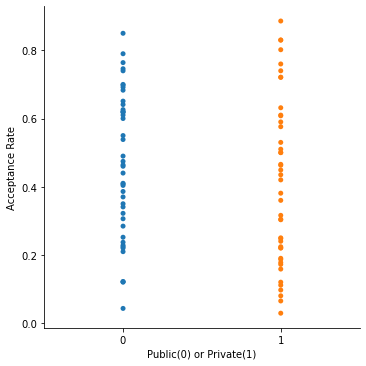

In [9]:
# Display the acceptance rate distribution for public schools and for private schools
sns.catplot(x='Public(0) or Private(1)',y='Acceptance Rate',jitter=False,data=df);

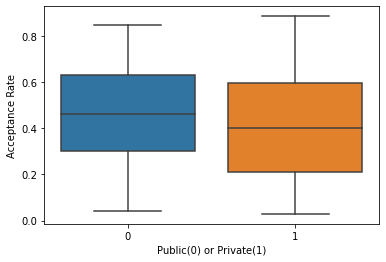

In [10]:
# Use side by side boxplots to highlight outliers
sns.boxplot(x='Public(0) or Private(1)',y='Acceptance Rate',data=df);

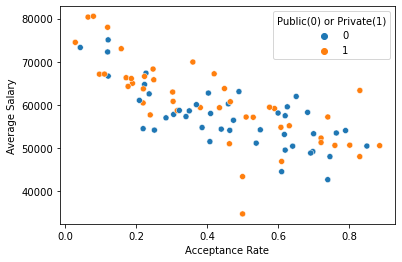

In [11]:
# Display relationship between acceptance rate and salary, broken down by school type 
sns.scatterplot(x='Acceptance Rate',y='Average Salary',hue='Public(0) or Private(1)',data=df);

In [12]:
df.columns

Index(['School_x', 'business_school', 'Acceptance Rate', 'Average Salary',
       'Public(0) or Private(1)'],
      dtype='object')

In [13]:
# Reformat column names
df.rename(columns={'School_x':'school', 
                   'Acceptance Rate':'acceptance_rate',
                   'Average Salary':'average_salary', 
                   'Public(0) or Private(1)':'public_private'},inplace=True)

In [14]:
df.head()

,school,business_school,acceptance_rate,average_salary,public_private
0,University of Pennsylvania (Wharton),Wharton,0.0649,80354,1
1,Washington University in St. Louis (Olin),Olin,0.0970,67115,1
2,University of California-Berkeley (Haas),Haas,0.0430,73302,0
3,Cornell University (Dyson),Dyson,0.0290,74493,1
4,University of Michigan (Ross),Ross,0.1200,72268,0


## Regressions on Variables of Interest

In [15]:
# Regress average salary on acceptance rate
result = sm.ols(formula="average_salary ~ acceptance_rate", 
                data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         average_salary   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     99.28
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           5.39e-16
Time:                        21:11:19   Log-Likelihood:                -886.87
No. Observations:                  88   AIC:                             1778.
Df Residuals:                      86   BIC:                             1783.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        7.085e+04   1349.317     

In [16]:
# Create a new variable for the log of average salary
df['ln_average_salary']=np.log(df['average_salary'])

In [17]:
# Regress the log of average salary on acceptance rate
result = sm.ols(formula="ln_average_salary ~ acceptance_rate", 
                data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      ln_average_salary   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     87.33
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           9.76e-15
Time:                        21:11:19   Log-Likelihood:                 75.489
No. Observations:                  88   AIC:                            -147.0
Df Residuals:                      86   BIC:                            -142.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.1727      0.024    4

In [19]:
# Regress the log of average salary on public vs private dummy variable
result = sm.ols(formula="ln_average_salary ~ public_private", 
                data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      ln_average_salary   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     3.146
Date:                Mon, 29 Nov 2021   Prob (F-statistic):             0.0797
Time:                        21:11:46   Log-Likelihood:                 46.232
No. Observations:                  88   AIC:                            -88.46
Df Residuals:                      86   BIC:                            -83.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.9460      0.022    501.

In [21]:
# Regress acceptance rate on public vs private dummy variable
result = sm.ols(formula="acceptance_rate ~ public_private", 
                data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        acceptance_rate   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.252
Date:                Mon, 29 Nov 2021   Prob (F-statistic):              0.266
Time:                        21:13:09   Log-Likelihood:                 6.3672
No. Observations:                  88   AIC:                            -8.734
Df Residuals:                      86   BIC:                            -3.780
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4641      0.034     13.